# Data Mining - Insurance Project
**Group Members**:
- Canhoto, Vera (m20210659@novaims.unl.pt)
- Correa, Lucas (m20211006@novaims.unl.pt)
- Shin, Doyun (m20200565@novaims.unl.pt)

In [164]:
# Jupyter notebook display size adjustment
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

<a class="anchor" id="0.1"></a>

# **Table of Contents**

Structured as per CRISP-DM method, but it was used flexibly to better reflect the focus of the project. Further qualitative elements are addressed in the report attached where applicable.

1. [Business Understanding](#1)
   - 1.1 [Business Objectives](#1.1)
   - 1.2 [Situation Assessment](#1.2)
   - 1.3 [Data Mining Goals](#1.3)
   - 1.4 [Project Plan](#1.4)


2. [Data Understanding](#2)
   - 2.1 [Initial Data Collection](#2.1)
   - 2.2 [Data Description](#2.2)
   - 2.3 [Data Exploration](#2.3)
   - 2.4 [Data Quality Verification](#2.4)
  
  
3. [Data Preparation](#3)
   - 3.1 [Data Selection](#3.1)
   - 3.2 [Data Cleaning](#3.2) 
   - 3.3 [Data Construction](#3.3) 
   - 3.4 [Data Integration](#3.4) 
   - 3.5 [Data Formatting](#3.5)
   - 3.6 [Dataset Description](#3.6)
   
   
4. [Modeling](#4)
   - 4.1 [Modeling Technique Selection](#4.1) 
   - 4.2 [Test Design](#4.2)
   - 4.3 [Model Building](#4.3)
   - 4.4 [Model Assessment](#4.4)
   
   
5. [Evaluation](#5)
   - 5.1 [Evaluate Results](#5.1)
   - 5.2 [Review Process](#5.2)
   - 5.3 [Next Steps](#5.3)
 

# 1. Business Understanding <a class="anchor" id="1"></a>

## 1.1 Business Objective <a class="anchor" id="1.1"></a>

To better understand customer profiles, especially from the marketing department's perspectives.

## 1.2 Situation Assessment <a class="anchor" id="1.2"></a>

**Computational power**

Computer1: 

Computer2: 

Computer3: 
- CPU: Intel(R) Core i5-8250U CPU
- Memory: 8GB
- GPU: Intel UHD Graphics 620
    
No significant hindrance identified in the initial stage, considering the size of the data and the required task.

**Programming Language:** Python

**Available / utilized libraries**

In [165]:
import pandas as pd
import numpy as np
import math
from math import ceil
import statsmodels.api as sm
import scipy as sp
from scipy import stats
from scipy.stats import chi2



# Data Exploration
from pandas_profiling import ProfileReport

# Missing Values imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# outliers
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from pyod.models.copod import COPOD as COF
from statsmodels import robust

# Preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer

# Clustering
#from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans


# hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import set_link_color_palette


# Visualization
#import matplotlib
#matplotlib.use('TkAgg', force=True)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option("display.max_rows", 20)

## 1.3 Data Mining Goals  <a class="anchor" id="1.3"></a>

In [166]:
# Conduct customer segmentation on the customer data => data mining problem type is segmentation


## 1.4 Project Plan  <a class="anchor" id="1.4"></a>

In [167]:
# possible clustering techniques: KNN or K-prototype, dependig on the data.

# 2. Data Understanding <a class="anchor" id="2"></a>

## 2.1 Initial Data Collection <a class="anchor" id="2.1"></a>

We have only one source of data hence assessment of potential quality problem from data merge is not applicable

In [168]:
df = pd.read_sas('a2z_insurance.sas7bdat')
df.tail()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
10291,10292.0,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293.0,1977.0,1952.0,b'1 - Basic',2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294.0,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91
10295,10296.0,1990.0,1981.0,b'4 - PhD',2815.0,1.0,1.0,463.75,0.27,414.08,94.45,141.25,6.89,12.89


## 2.2 Data Description  <a class="anchor" id="2.2"></a>
Based on the metadata provided with some errors in the project description was corrected (eg., all the variable names, description of Birthday was "Customer’s first policy", etc)

Data on 10,290 Customers of the insurance company

| Name | Meaning | Additional Info | 
| :--: | :--------| :--------| 
| CustID | ID | - | 
| FirstPolYear | Year of the customer's first policy | May be considered as the first year as a customer |
| Birthday | Customer's birthday | The current year of the database is 2016|
| EducDeg | Academic Degree | - |
| MonthSal | Gross monthly salary (€) | - |
| GeoLivArea | Living area | No further information provided about the meaning of the area codes |
| Children | Binary variable (Y=1) | - |
| CustMonVal | Customer Monetary Value | Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost) |
| ClaimsRate | Claims Rate| Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years|
| PremMotor | Premiums (€) in LOB: Motor | Annual Premiums (2016) Negative premiums may manifest reversals occurred in the current year, paid in previous one(s). Applicable to all Prem* variables |
| PremHousehold | Premiums (€) in LOB: Household | * |
| PremHealth | Premiums (€) in LOB: Health | * |
| PremLife | Premiums (€) in LOB: Life | * |
| PremWork | Premiums (€) in LOB: Work| * |

## 2.3 Data Exploration  <a class="anchor" id="2.3"></a>

In [169]:
# Check default import data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,10296.0,5148.500000,2972.343520,1.00,2574.75,5148.50,7722.2500,10296.00
FirstPolYear,10266.0,1991.062634,511.267913,1974.00,1980.00,1986.00,1992.0000,53784.00
BirthYear,10279.0,1968.007783,19.709476,1028.00,1953.00,1968.00,1983.0000,2001.00
MonthSal,10260.0,2506.667057,1157.449634,333.00,1706.00,2501.50,3290.2500,55215.00
GeoLivArea,10295.0,2.709859,1.266291,1.00,1.00,3.00,4.0000,4.00
Children,10275.0,0.706764,0.455268,0.00,0.00,1.00,1.0000,1.00
CustMonVal,10296.0,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,0.742772,2.916964,0.00,0.39,0.72,0.9800,256.20
PremMotor,10262.0,300.470252,211.914997,-4.11,190.59,298.61,408.3000,11604.42
PremHousehold,10296.0,210.431192,352.595984,-75.00,49.45,132.80,290.0500,25048.80


In [171]:
# Check the number of entries.
df.shape

(10296, 14)

**Inconsistency in the number of customers**

The data was supposed to have 10290 records, hence a check is needed.

In [172]:
# The number of rows exceeds the number of customers by 6. Check for duplicates excluding CustID (unique)
tmp = df.loc[:, df.columns != 'CustID']
tmp.drop_duplicates()
tmp

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,1977.0,1952.0,b'1 - Basic',2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,1981.0,1977.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


Confirmed later by the provider of the data there it was a rounding error.

In [173]:
# Check for duplicates of the unique customer ID
df.duplicated(subset='CustID').sum()

0

In [174]:
# EducDeg appears to be ordinal. In which case, it would be better to convert it before producing profile report. (Normally would be included in Feature Engineering section)
df.EducDeg.unique()

array([b'2 - High School', b'1 - Basic', b'3 - BSc/MSc', b'4 - PhD', nan],
      dtype=object)

In [175]:
# Decode to handle bytes then extract the numerical characters and replace the string to numerical, ordinal variable.
df['EducDeg'] = df['EducDeg'].str.decode('UTF-8').str.extract('(\d+)', expand=False)
df

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,2,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,1,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,3,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,3,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292.0,1984.0,1949.0,4,3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293.0,1977.0,1952.0,1,2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294.0,1994.0,1976.0,3,2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,1,1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [176]:
# Pandas prifiling - disabled after the initial report 
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("DM_PandasProfile.html")
#profile.to_notebook_iframe()

**Consideration A**

A1. Some decimal values such as year variable may just be integers. Need to investigate the nature of those values and required treatment (eg., if there's year 1975.7, it can't just be rounded to 1976 without knowing the nature of this entry)<br>
A2. Presence of extreme values that are obviously impossible (fails coherence check) in FirstPolYear and BirthYear.<br>
A3. Outliers that are theoretically possible (or uncertain whether it's impossible), hence requiring further investigation in MonthSal, ClaimsRate, and Prem variables.<br>
A4. EducDeg can be converted to numerical, ordinal variable<br>
A5. GeoLivArea and Children == Categorical (should be converted from float to object type)<br>
A6. Some missing values in most variables<br>
A7. There are 10296 entries instead of 10290 entries as stated in the project description. Quick duplicate check did not reveal any reason behind it. Needs to be confirmed (UPDATE 21 Oct: Consider it a rounding error)<br>


The section below investigates these considerations:

## 2.4 Data Quality Verification  <a class="anchor" id="2.4"></a>

### 2.4.1 Decimal values check  <a class="anchor" id="2.4.1"></a>

In regards to Consideration A1

In [177]:
# Check 
tmp = int(len(df)) # max length

# Instead of counting what is not an integer, we need to count what IS an integer and subtract from the max length due to the presence of NAN values.
for column in df:
    if (df[column].dtype) == "float64":
        only_num = [num for num in df[column] if num % 1 == 0]
        count = tmp-len(only_num)
        print('{}: {}'.format(column, count))  
        

CustID: 0
FirstPolYear: 30
BirthYear: 17
MonthSal: 36
GeoLivArea: 1
Children: 21
CustMonVal: 9653
ClaimsRate: 9777
PremMotor: 10296
PremHousehold: 9205
PremHealth: 10294
PremLife: 9433
PremWork: 9376


In [178]:
# Compare with null values. The result shows some columns--CustID, FirstPolYear, BirthYear, MonthSal, GeoLivArea, Children
# are just integers mixed with nulls.
df.isnull().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

**Missing Values in PremMotor, PremHealth, PremLife, PremWork**

In [179]:
# Count number of zeros in all columns of Dataframe
for c in df.columns:
    column = df[c]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Number of zeros in column', c, ' is : ', count)

Number of zeros in column CustID  is :  0
Number of zeros in column FirstPolYear  is :  0
Number of zeros in column BirthYear  is :  0
Number of zeros in column EducDeg  is :  0
Number of zeros in column MonthSal  is :  0
Number of zeros in column GeoLivArea  is :  0
Number of zeros in column Children  is :  3013
Number of zeros in column CustMonVal  is :  2
Number of zeros in column ClaimsRate  is :  58
Number of zeros in column PremMotor  is :  0
Number of zeros in column PremHousehold  is :  60
Number of zeros in column PremHealth  is :  0
Number of zeros in column PremLife  is :  0
Number of zeros in column PremWork  is :  0


For the following reasons we will treat the missing values in Prem- variables as 0:
1. There is no missing value in Prem-Household, however, there are zeroes.
2. For all other Prem- variables it's the opposite: there are no zeroes, but only missing values.
3. We infer it's the company's internal practice to keep PremHousehold filled with a value at all times to prevent all values missing across all the prem-variables, but permit non-entry in other variables in case of 0 premium.
4. The number of missing values in Prem- variables is very low, at most 104 entries (PremLife, less than 1% of the data). Hence the impact of this inferrence is expected to be small to the overall quality of the data. We convert these missing values to 0.

### 2.4.2 Initial Coherence Check  <a class="anchor" id="2.4.2"></a>

**Min-max values**

In [180]:
# We can detect obviously impossible values from min - max values.
df.describe().loc[['min','max']]

,CustID,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
min,1.0,1974.0,1028.0,333.0,1.0,0.0,-165680.42,0.0,-4.11,-75.0,-2.11,-7.0,-12.0
max,10296.0,53784.0,2001.0,55215.0,4.0,1.0,11875.89,256.2,11604.42,25048.8,28272.00,398.3,1988.7


- The above indicates max value of FirstPolYear, minimum value of BirthYear are impossible values.

**FirstPolYear**

In [181]:
# The min value of FirstPolYear (1974) is a possible value. Hence only the largest value needs to be checked.
df.nlargest(5, 'FirstPolYear')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
9294,9295.0,53784.0,1948.0,3,3268.0,1.0,0.0,348.85,0.37,351.40,15.0,187.37,22.45,17.78
23,24.0,1998.0,1961.0,2,2870.0,4.0,1.0,290.05,0.64,222.04,329.5,248.38,48.01,33.56
65,66.0,1998.0,1941.0,3,3760.0,1.0,0.0,132.27,0.78,276.83,175.6,261.27,6.89,-6.11
279,280.0,1998.0,1938.0,1,4386.0,1.0,0.0,193.04,0.79,96.02,541.2,189.59,127.69,90.35
506,507.0,1998.0,1942.0,1,3743.0,1.0,0.0,-46.67,1.02,85.24,554.0,307.39,46.12,24.45


No indication the data integrity is compromised, considering there's only one illogical value (53784). Dropping the row can be considered.

In [182]:
# Drop those two rows
df = df[df['FirstPolYear'] != 53784]

**BirthYear**

In [183]:
# The max value of BirthYear (2001) is possible. Check the mins. 
df.nsmallest(5, 'BirthYear')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
7195,7196.0,1993.0,1028.0,3,2830.0,4.0,0.0,146.02,0.77,428.97,192.80,108.91,1.89,23.67
329,330.0,1979.0,1935.0,2,4292.0,1.0,1.0,-47.77,1.04,457.64,-20.55,94.35,47.23,-1.11
958,959.0,1996.0,1935.0,1,4133.0,2.0,1.0,594.33,0.38,257.05,511.20,129.58,29.56,78.57
1013,1014.0,1996.0,1935.0,3,4247.0,2.0,0.0,-98.79,1.09,142.36,299.50,307.17,24.67,73.79
3191,3192.0,1990.0,1935.0,3,4475.0,3.0,0.0,433.97,0.45,111.80,339.50,268.83,106.91,12.56


No indication the data integrity is compromised, considering there's only one illogical value (1028). Dropping the row can be considered or imputation from EducDeg.

In [184]:
# Drop those two rows
df = df[df['BirthYear'] != 1028]

In [185]:
df.describe().loc[['min','max']]

,CustID,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
min,1.0,1974.0,1935.0,333.0,1.0,0.0,-165680.42,0.0,-4.11,-75.0,-2.11,-7.0,-12.0
max,10296.0,1998.0,2001.0,55215.0,4.0,1.0,11875.89,256.2,11604.42,25048.8,28272.00,398.3,1988.7


**Cases of BirthYear < FirstPolYear, i.e., people born after the FirstPolYear**

In [186]:
# Check for entries where BirthYear < FirstPolYear (Assuming an unborn person cannot be insured)
df.query('FirstPolYear < BirthYear')

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
1,2.0,1981.0,1995.0,2,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
13,14.0,1983.0,2000.0,1,1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
18,19.0,1981.0,1982.0,1,1414.0,3.0,1.0,230.38,0.71,313.17,373.40,121.80,14.78,72.57
22,23.0,1976.0,1986.0,2,1495.0,1.0,1.0,-89.79,1.08,209.04,308.95,192.48,64.79,54.90
40,41.0,1994.0,1995.0,2,1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,10269.0,1987.0,1988.0,3,1414.0,3.0,1.0,50.46,0.90,129.58,167.80,184.48,165.92,75.46
10273,10274.0,1989.0,1992.0,2,1035.0,1.0,1.0,293.51,0.58,235.71,195.60,103.13,170.92,58.12
10284,10285.0,1980.0,1987.0,3,1504.0,4.0,1.0,-1.55,0.96,390.63,29.45,179.70,-6.00,NaN
10288,10289.0,1982.0,1993.0,2,1465.0,1.0,1.0,795.15,0.35,67.79,820.15,102.13,182.48,86.46


2160 rows = 21% of the total data. Data integrity may have been compromised, requires a clarification. Considering the originally incorrect description of BirthYear, this feature may be the problem rather than FirstPolYear.

In [187]:
yr_no_df = df.query('FirstPolYear < BirthYear').copy()

<AxesSubplot:xlabel='BirthYear'>

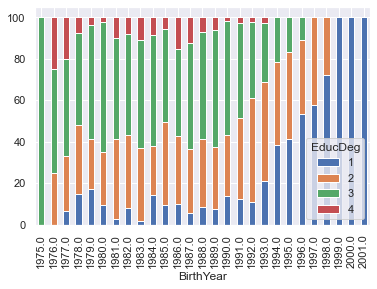

In [188]:
# Assumption 1: EducDeg should correspond with BirthYear
aggre= yr_no_df[['BirthYear','EducDeg']].groupby(['BirthYear','EducDeg'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

- The BirthYear variable follows highly logical correlation with EducDeg, especially looking at primary education, which is mandatory for all citizens in Portugal

<AxesSubplot:xlabel='BirthYear'>

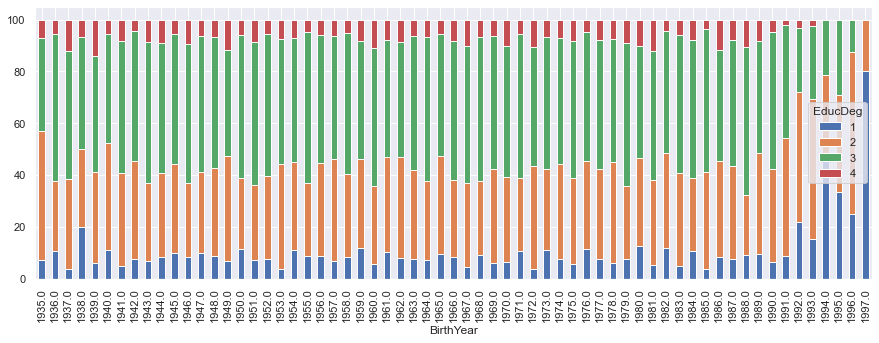

In [189]:
# Compare the trend where the coherence check pases
yr_ok_df = df.query('FirstPolYear >= BirthYear').copy()

plt.rcParams['figure.figsize'] = [15, 5]
aggre= yr_ok_df[['BirthYear','EducDeg']].groupby(['BirthYear','EducDeg'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='BirthYear'>

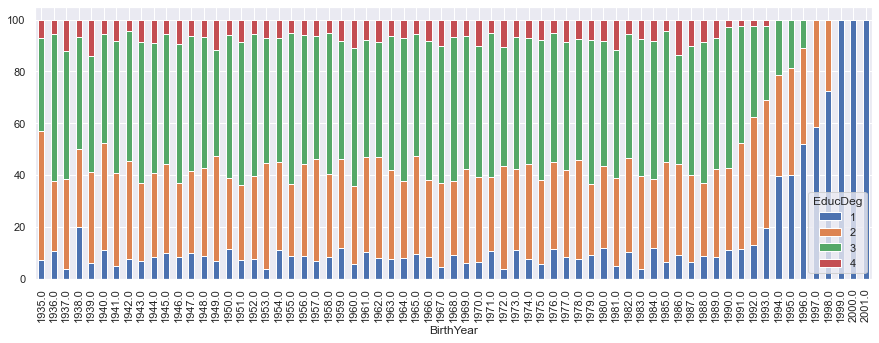

In [190]:
# Education Trend in all data
plt.rcParams['figure.figsize'] = [15, 5]
aggre= df[['BirthYear','EducDeg']].groupby(['BirthYear','EducDeg'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

- Again to highlight: the BirthYear variable follows highly logical correlation with EducDeg, especially looking at primary education, which is mandatory for all citizens in Portugal
- meaning, if we reject BrithYear variable, we should suspect EducDeg variable as well.

<AxesSubplot:xlabel='FirstPolYear'>

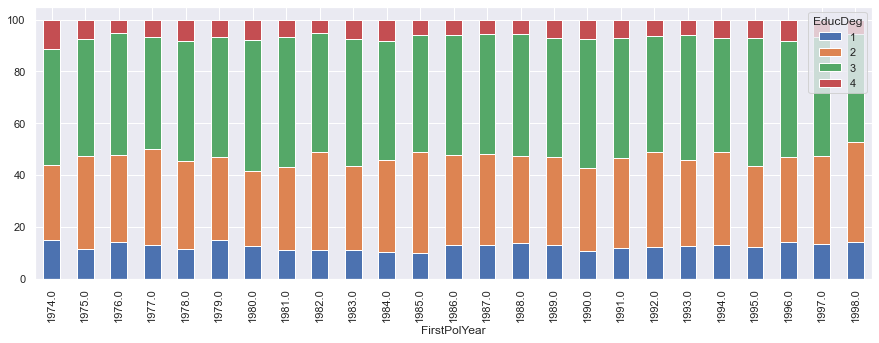

In [191]:
# Education Trend based on FirstPolYear
plt.rcParams['figure.figsize'] = [15, 5]
aggre= df[['FirstPolYear','EducDeg']].groupby(['FirstPolYear','EducDeg'])['FirstPolYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [192]:
# Assumption 2: Children should correspond with BirthYear
# Number of rows per birthyear
yr_no_df['BirthYear'].value_counts().sort_index()

1975.0      3
1976.0      4
1977.0     15
1978.0     27
1979.0     29
         ... 
1997.0    128
1998.0     94
1999.0     69
2000.0     35
2001.0     12
Name: BirthYear, Length: 27, dtype: int64

In [193]:
pd.set_option("display.max_rows", 28)
yr_no_df.groupby('BirthYear', as_index=False)['Children'].mean()

,BirthYear,Children
0,1975.0,1.000000
1,1976.0,0.750000
2,1977.0,0.933333
3,1978.0,0.962963
4,1979.0,0.862069
5,1980.0,0.976744
6,1981.0,0.951220
7,1982.0,0.940000
8,1983.0,0.925926
9,1984.0,0.957746


In [194]:
yr_no_df.loc[(yr_no_df["BirthYear"] == 1975) & (yr_no_df["FirstPolYear"] < 1975)]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
741,742.0,1974.0,1975.0,3,2039.0,3.0,1.0,453.87,0.17,479.98,14.45,83.35,0.89,-0.11
4721,4722.0,1974.0,1975.0,3,1939.0,4.0,1.0,-20.00,0.99,320.95,78.35,236.60,5.89,0.89
8427,8428.0,1974.0,1975.0,3,2348.0,1.0,1.0,423.32,0.23,474.31,-15.55,106.91,5.89,11.00


In [195]:
yr_no_df.loc[(yr_no_df["BirthYear"] == 1976) & (yr_no_df["FirstPolYear"] < 1976)]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
924,925.0,1975.0,1976.0,4,1783.0,3.0,1.0,-1.21,0.96,488.87,8.90,87.46,0.89,14.89
5535,5536.0,1974.0,1976.0,3,2450.0,4.0,0.0,533.32,0.34,151.25,310.05,60.90,115.91,212.93
8498,8499.0,1975.0,1976.0,2,1944.0,1.0,1.0,-72.12,1.07,298.61,39.45,213.15,7.78,86.57
9127,9128.0,1974.0,1976.0,3,1622.0,4.0,1.0,-40.00,1.03,514.32,-5.00,61.79,-5.00,NaN


In [196]:
yr_no_df.loc[(yr_no_df["BirthYear"] == 1977) & (yr_no_df["FirstPolYear"] < 1977)]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
134,135.0,1976.0,1977.0,4,1810.0,2.0,1.0,543.21,0.14,490.98,79.45,86.35,-1.11,3.89
161,162.0,1975.0,1977.0,3,2285.0,1.0,0.0,471.21,0.25,349.40,87.80,142.47,9.78,68.79
268,269.0,1976.0,1977.0,2,1697.0,4.0,1.0,-42.67,1.02,331.84,177.80,181.70,44.12,17.67
1812,1813.0,1976.0,1977.0,3,2223.0,1.0,1.0,-51.44,1.05,468.09,-20.55,95.13,2.89,5.89
3216,3217.0,1975.0,1977.0,1,2196.0,1.0,1.0,179.26,0.73,204.26,234.50,178.81,24.45,118.58
4891,4892.0,1975.0,1977.0,2,1920.0,1.0,1.0,432.74,0.51,222.04,408.40,127.58,69.68,103.02
5388,5389.0,1976.0,1977.0,4,1810.0,2.0,1.0,-26.11,1.01,NaN,79.45,86.35,-1.11,3.89
5491,5492.0,1976.0,1977.0,3,1858.0,1.0,1.0,-52.76,1.05,385.63,-6.10,159.14,26.56,11.00
5526,5527.0,1974.0,1977.0,2,1949.0,4.0,1.0,-25.00,1.00,128.47,575.10,173.70,74.68,96.24
6213,6214.0,1976.0,1977.0,3,1601.0,1.0,1.0,452.54,0.17,457.42,-0.55,99.02,0.89,19.78


In [197]:
yr_no_df.loc[(yr_no_df["BirthYear"] == 1978) & (yr_no_df["FirstPolYear"] < 1978)]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
293,294.0,1977.0,1978.0,2,2128.0,1.0,1.0,541.54,0.30,348.62,241.70,151.14,44.23,23.78
343,344.0,1976.0,1978.0,3,782.0,1.0,1.0,413.41,0.47,185.48,300.05,298.50,24.45,22.67
1034,1035.0,1976.0,1978.0,3,1775.0,2.0,1.0,187.38,0.72,222.71,230.05,295.61,6.00,11.67
1071,1072.0,1975.0,1978.0,2,2366.0,1.0,1.0,357.08,0.32,397.63,-15.55,145.14,25.56,7.78
1763,1764.0,1977.0,1978.0,1,2230.0,4.0,1.0,464.09,0.26,468.42,78.35,96.24,4.78,15.89
1796,1797.0,1975.0,1978.0,2,1735.0,3.0,1.0,125.37,0.78,407.41,102.25,116.91,33.34,14.78
1934,1935.0,1977.0,1978.0,3,1513.0,3.0,1.0,-53.98,1.05,410.52,-11.10,159.92,NaN,6.78
2518,2519.0,1975.0,1978.0,2,2045.0,3.0,1.0,213.60,0.71,238.60,314.50,221.71,42.34,18.45
3468,3469.0,1974.0,1978.0,2,1151.0,1.0,1.0,-189.78,1.30,370.18,-45.55,111.02,73.68,49.23
3679,3680.0,1977.0,1978.0,1,2083.0,4.0,1.0,564.10,0.27,337.62,236.70,188.59,14.78,24.56


<AxesSubplot:xlabel='BirthYear'>

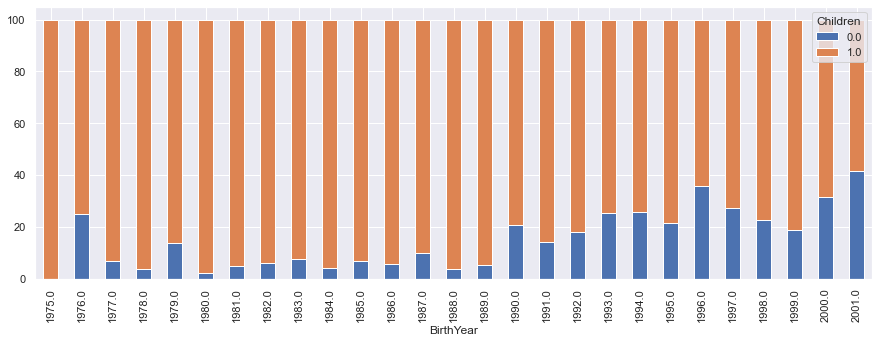

In [198]:
# Assumption 2: Children should correspond with BirthYear
aggre = yr_no_df[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [199]:
yr_no_df.count()

CustID           1997
FirstPolYear     1997
BirthYear        1997
EducDeg          1996
MonthSal         1985
GeoLivArea       1997
Children         1994
CustMonVal       1997
ClaimsRate       1997
PremMotor        1989
PremHousehold    1997
PremHealth       1985
PremLife         1985
PremWork         1981
dtype: int64

- significant ratio of people under age of 18 appear to have children. This may be illogical, but that may be due to the sampling bias--if you have a kid at very young age, you are highly likely to seek insurance coverage.

In [200]:
# If we only look at people who were adults when they made their first policy
adultfirstpol = df.copy()
adultfirstpol.insert(3, 'entryAge', (adultfirstpol['FirstPolYear'] - adultfirstpol['BirthYear']))
adultfirstpol = adultfirstpol.loc[(adultfirstpol["entryAge"] >= 18)]
len(adultfirstpol)

5194

<AxesSubplot:xlabel='BirthYear'>

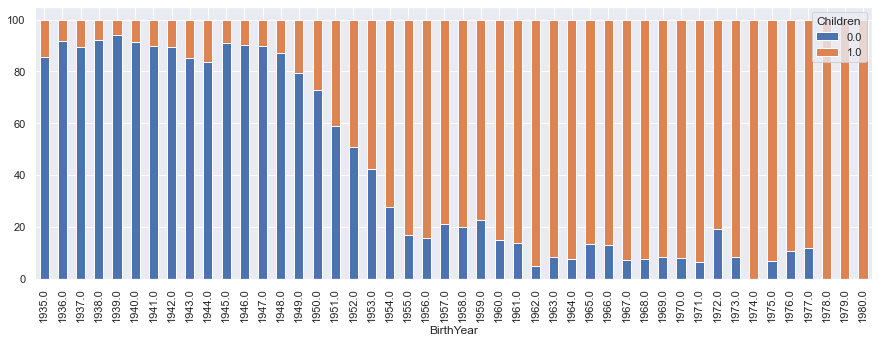

In [201]:
aggre = adultfirstpol[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

<AxesSubplot:xlabel='entryAge'>

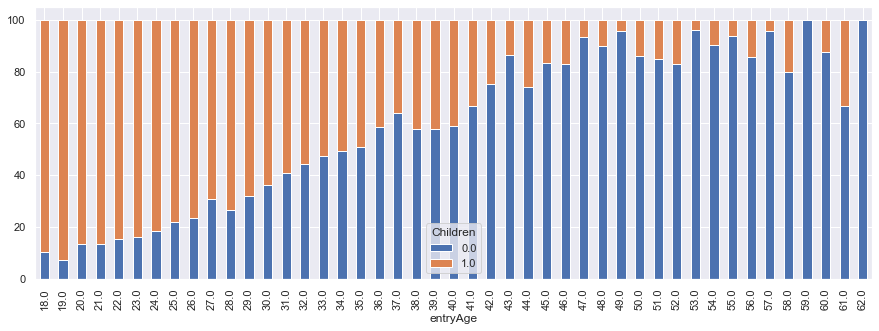

In [202]:
aggre = adultfirstpol[['entryAge','Children']].groupby(['entryAge','Children'])['entryAge'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [203]:
# If we only look at minimum age for insurance coverage
minagefirstpol = df.copy()
minagefirstpol.insert(3, 'entryAge', (minagefirstpol['FirstPolYear'] - minagefirstpol['BirthYear']))
minagefirstpol = minagefirstpol.loc[(minagefirstpol["entryAge"] >= 10)]
len(minagefirstpol)

6546

<AxesSubplot:xlabel='entryAge'>

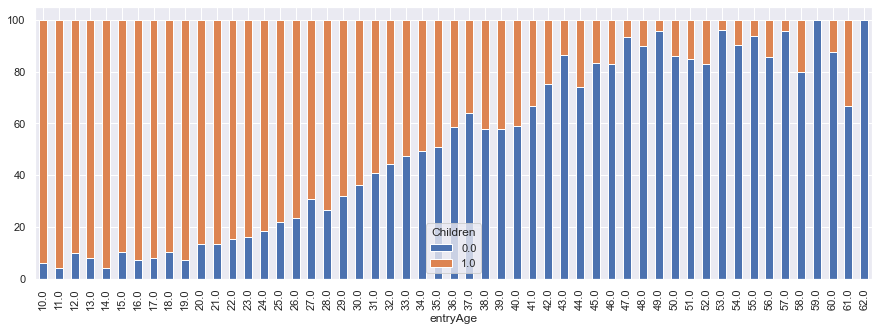

In [204]:
aggre = minagefirstpol[['entryAge','Children']].groupby(['entryAge','Children'])['entryAge'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [205]:
pd.set_option("display.max_rows", None)

In [206]:
yrcheck_df = df.query('FirstPolYear >= BirthYear').copy()
yrcheck_df['BirthYear'].value_counts().sort_index()

1935.0     14
1936.0     37
1937.0     57
1938.0     76
1939.0    100
1940.0    126
1941.0    145
1942.0    161
1943.0    163
1944.0    170
1945.0    165
1946.0    182
1947.0    170
1948.0    164
1949.0    178
1950.0    150
1951.0    185
1952.0    186
1953.0    192
1954.0    184
1955.0    171
1956.0    173
1957.0    173
1958.0    171
1959.0    171
1960.0    165
1961.0    155
1962.0    205
1963.0    186
1964.0    191
1965.0    160
1966.0    168
1967.0    179
1968.0    199
1969.0    130
1970.0    170
1971.0    149
1972.0    143
1973.0    163
1974.0    186
1975.0    173
1976.0    165
1977.0    168
1978.0    146
1979.0    134
1980.0    127
1981.0    149
1982.0    111
1983.0    103
1984.0    113
1985.0     85
1986.0     86
1987.0     78
1988.0     77
1989.0     74
1990.0     64
1991.0     46
1992.0     32
1993.0     39
1994.0     33
1995.0     24
1996.0      8
1997.0      5
Name: BirthYear, dtype: int64

<AxesSubplot:xlabel='BirthYear'>

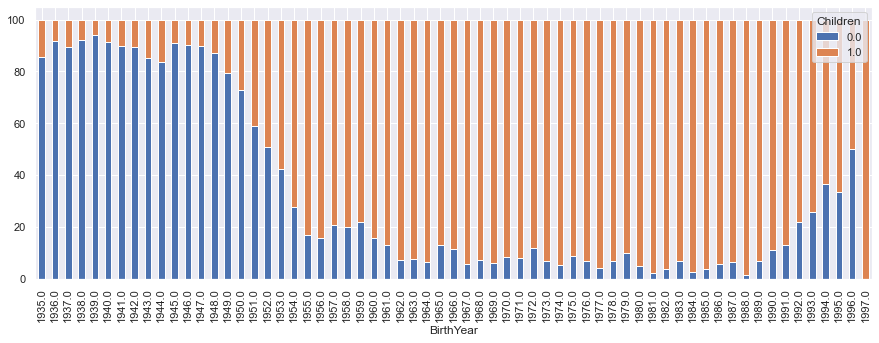

In [207]:
# Compare the trend where the coherence check pases
yrcheck_df = df.query('FirstPolYear >= BirthYear').copy()

plt.rcParams['figure.figsize'] = [15, 5]
aggre = yrcheck_df[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

- All data from birthyear 1997 fails coherence test. In year 2016, these individuals are 19 years old. But the data refers to premium paid in 2016, meaning the year people born in 1997 entered the contract was 2015, when they were 18. Note, Age of 18 is the age you are no longer required parental consent to make an insurance policy.
- older you get, less likely you have children: Children variable may not be whether they have a child, but whether they have a child in the household. The graph above follows this trend.

<AxesSubplot:xlabel='BirthYear'>

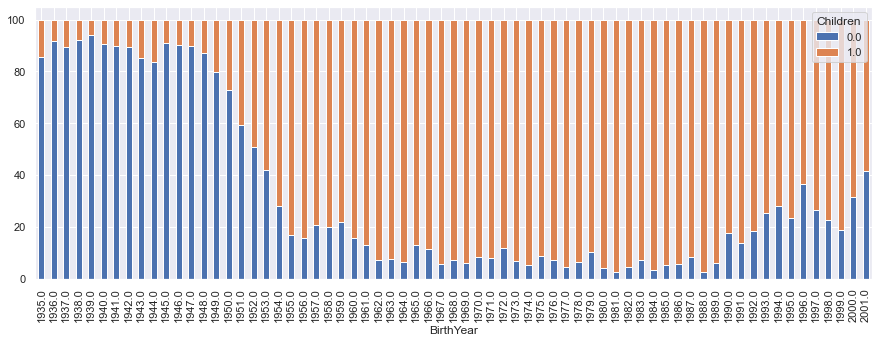

In [208]:
# Total trend
plt.rcParams['figure.figsize'] = [15, 5]
aggre = df[['BirthYear','Children']].groupby(['BirthYear','Children'])['BirthYear'].agg(Frequency='count')
ratio = aggre.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
ratio.Frequency.unstack().plot.bar(stacked=True)

In [209]:
len(df[(df['Children'] == 1) & (df['BirthYear'] == 1999)])

56

In [210]:
# You can be as young as 10 to enter an insurance policy as long as you have parental consent(needs to be checked for portugal)
# PremMotor check, since minimum age for driving is 16 in Portugal (motorcycle).
# PremWork, min working age is 16.
# It's premium 
df[(df['BirthYear'] > 1999)]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
13,14.0,1983.0,2000.0,1,1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
397,398.0,1986.0,2000.0,1,415.0,1.0,1.0,-218.48,1.22,52.01,348.40,49.01,193.48,225.82
659,660.0,1991.0,2001.0,1,1284.0,4.0,1.0,243.50,0.81,46.23,1079.65,72.68,252.27,-10.00
689,690.0,1997.0,2001.0,1,1180.0,3.0,1.0,436.10,0.48,54.90,406.20,65.79,112.02,256.05
865,866.0,1979.0,2001.0,1,562.0,1.0,1.0,1113.78,0.11,40.34,847.95,94.24,178.70,112.13
893,894.0,1978.0,2000.0,1,698.0,4.0,1.0,406.97,0.48,61.68,323.40,75.46,261.16,109.13
900,901.0,1979.0,2000.0,1,845.0,1.0,1.0,958.86,0.22,35.45,833.50,218.93,9.78,160.14
1336,1337.0,1996.0,2000.0,1,1057.0,4.0,0.0,749.58,0.41,78.35,909.05,159.14,134.47,41.23
1436,1437.0,1989.0,2001.0,1,823.0,4.0,0.0,281.28,0.60,129.58,177.80,58.01,176.70,218.15
1613,1614.0,1990.0,2000.0,1,1274.0,3.0,1.0,126.36,0.90,15.78,1065.75,45.01,227.82,92.24


In [211]:
pd.set_option("display.max_rows", 20)

In [212]:
# Drop BirthYear
df.drop('BirthYear',axis=1,inplace=True)

### 2.4.3 Outliers
Concept of "outlier" doesn't really apply to categorical variables. We observe frequencies instead.

In [213]:
df[['GeoLivArea','Children']] = df[['GeoLivArea','Children']].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10294 entries, 0 to 10295
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10294 non-null  float64
 1   FirstPolYear   10264 non-null  float64
 2   EducDeg        10277 non-null  object 
 3   MonthSal       10258 non-null  float64
 4   GeoLivArea     10293 non-null  object 
 5   Children       10273 non-null  object 
 6   CustMonVal     10294 non-null  float64
 7   ClaimsRate     10294 non-null  float64
 8   PremMotor      10260 non-null  float64
 9   PremHousehold  10294 non-null  float64
 10  PremHealth     10251 non-null  float64
 11  PremLife       10190 non-null  float64
 12  PremWork       10208 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.4+ MB


In [214]:
cat_features = df.select_dtypes('object')
cat_features.insert(0, 'CustID', df['CustID'])
cat_features

,CustID,EducDeg,GeoLivArea,Children
0,1.0,2,1,1
1,2.0,2,4,1
2,3.0,1,3,0
3,4.0,3,4,1
4,5.0,3,4,1
...,...,...,...,...
10291,10292.0,4,2,0
10292,10293.0,1,3,0
10293,10294.0,3,1,1
10294,10295.0,1,2,1


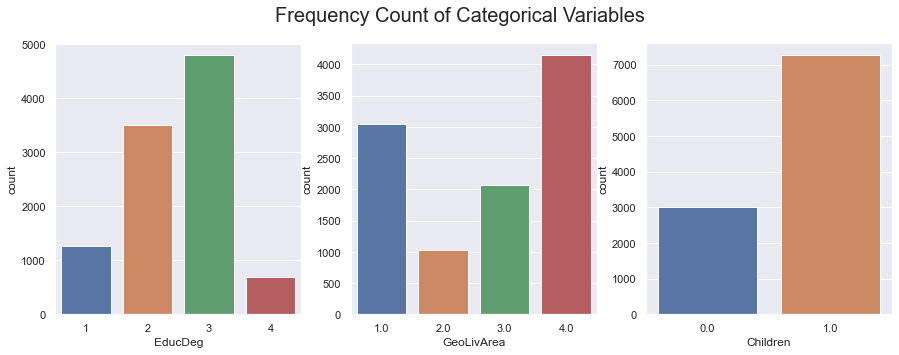

In [215]:
fig, ax = plt.subplots(1,3)
fig.suptitle('Frequency Count of Categorical Variables', fontsize = 20)

sns.countplot(df['EducDeg'], ax=ax[0], order=['1','2','3','4'])
sns.countplot(df['GeoLivArea'], ax=ax[1])
sns.countplot(df['Children'], ax=ax[2])

fig.show()

In [216]:
num_features= df.select_dtypes('float64')
num_features.set_index('CustID', inplace=True)
num_features

,FirstPolYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,
1.0,1985.0,2177.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981.0,677.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991.0,2277.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990.0,1099.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986.0,1763.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...
10292.0,1984.0,3188.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293.0,1977.0,2431.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10294.0,1994.0,2918.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89


In [217]:
# # All numerical Variables' Box Plots in one figure
# sns.set()


# # Prepare figure. Create individual axes where each box plot will be placed
# fig, axes = plt.subplots(ceil(len(num_features.columns.to_list()) / 2), 2, figsize=(20, 11))

# # Plot data
# # Iterate across axes objects and associate each box plot (hint: use the ax argument):
# for ax, feat in zip(axes.flatten(), num_features.columns.to_list()): # Notice the zip() function and flatten() method
#     sns.boxplot(x=df[feat], ax=ax)
    
# # Layout
# # Add a centered title to the figure:
# title = "numerical Variables' Box Plots"

# plt.suptitle(title)

# #plt.savefig(os.path.join('..', 'figures', 'num_variables_boxplots.png'), dpi=200)
# plt.show()

In [218]:
# #  Arbitrary values set to rid of extreme outliers, filtered only for better vizualization this step
# filters=(
#     (df['FirstPolYear']!=53784) &
#     (df['BirthYear']>1900) &
#     (df['MonthSal']<20000) &
#     (df['CustMonVal']>-400) &
#     (df['ClaimsRate']<50) &
#     (df['PremMotor']<2500) &
#     (df['PremHousehold']<3000) &
#     (df['PremHealth']<3000) &
#     (df['PremWork']<500)
# )

# visualization_num_var = df[filters]
# print("% of observations considered outliers: {}%".format(int(round(1-visualization_num_var.shape[0]/df.shape[0],2)*100)))

# # Pairwise Relationship of numerical Variables
# sns.set()

# # Setting pairplot
# sns.pairplot(visualization_num_var[num_features.columns.to_list()+['Children']], diag_kind="hist",hue='Children') # new_df variable removed for now

# # Layout
# plt.subplots_adjust(top=0.95)
# plt.suptitle("Pairwise Relationship of numerical Variables", fontsize=20)

# plt.show()

# 3. Data Preparation  <a class="anchor" id="3"></a>

## 3.1 Data Selection  <a class="anchor" id="3.1"></a>

We are tasked with a segmentation problem, without specific feature of interest communicated from the insurance company. Therefore feature selection can be done qualitatively, with some consideration of results found from the previous sections (e.g., multicollinearity)

we can mention Lucas's job as a industry insider's opinion?

## 3.2 Data Cleaning  <a class="anchor" id="3.2"></a>

### 3.2.1 Impossible Values

In [219]:
# we drop these two records for being impossible
df = df.loc[(df["FirstPolYear"] != 53784.0)]

### 3.2.2 Missing Values

In [220]:
df.isnull().sum()

CustID             0
FirstPolYear      30
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [221]:
premiums = ['PremLife','PremMotor','PremHousehold','PremHealth','PremWork']

# To store imputed CustID
tmp = df[df[premiums].isnull().any(axis=1)]
imp_prem_id = tmp['CustID']
len(imp_prem_id)

225

In [222]:
# As discussed in session 2.4, we treat nan values for premiums as zeros
df[premiums] = df[premiums].fillna(0)

In [223]:
df.isnull().sum()

CustID            0
FirstPolYear     30
EducDeg          17
MonthSal         36
GeoLivArea        1
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [224]:
# https://arxiv.org/ftp/arxiv/papers/1211/1211.1799.pdf#:~:text=The%20commonly%20used%20method%20for,of%20the%20attribute%20%5B5%5D.
# "The commonly used method for missing values imputation in categorical data is to substitute missing values of each attribute by the most common value of the attribute"
# i.e., mode
categorical = ['EducDeg','GeoLivArea','Children']

# To store imputed CustID
tmp = df[df[categorical].isnull().any(axis=1)]
imp_cat_id = tmp['CustID']
len(imp_prem_id)

225

In [225]:
# Impute categorical with mode
df[categorical] = df[categorical].fillna(df[categorical].mode().iloc[0])

In [226]:
df.isnull().sum()

CustID            0
FirstPolYear     30
EducDeg           0
MonthSal         36
GeoLivArea        0
Children          0
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64

In [227]:
# these are some clients that don't have any insurance (all prem- values being nan/0 values) and CustMonVal == -25 which we believe to be the acquisition value
# in that sense we can't make a cluster with this obs because would't be representative enought, so we decided to drop it
df = df.loc[~((df.PremLife==0)&
               (df.PremMotor==0)&
               (df.PremHousehold==0)&
               (df.PremHealth==0)&
               (df.PremWork==0)
             )
          ]

In [228]:
df['CustID'] = df['CustID'].astype(int)

In [229]:
df[['EducDeg','GeoLivArea','Children']] = df[['EducDeg','GeoLivArea','Children']].astype('object')

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10282 entries, 0 to 10295
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10282 non-null  int32  
 1   FirstPolYear   10252 non-null  float64
 2   EducDeg        10282 non-null  object 
 3   MonthSal       10246 non-null  float64
 4   GeoLivArea     10282 non-null  object 
 5   Children       10282 non-null  object 
 6   CustMonVal     10282 non-null  float64
 7   ClaimsRate     10282 non-null  float64
 8   PremMotor      10282 non-null  float64
 9   PremHousehold  10282 non-null  float64
 10  PremHealth     10282 non-null  float64
 11  PremLife       10282 non-null  float64
 12  PremWork       10282 non-null  float64
dtypes: float64(9), int32(1), object(3)
memory usage: 1.1+ MB


In [231]:
df

,CustID,FirstPolYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1,1985.0,2,2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,2,677.0,4,1,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,1,2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,3,1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,3,1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292,1984.0,4,3188.0,2,0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293,1977.0,1,2431.0,3,0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294,1994.0,3,2918.0,1,1,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295,1981.0,1,1971.0,2,1,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [232]:
# There remains MonthSal and FirstPolYear (numerical) for missing values.
# We base the k (n_neighbors) value based on rule of thum: sqrt(n), rounded to an odd number = 101
math.sqrt(len(df))

101.40019723846694

In [233]:
imputer = KNNImputer(n_neighbors=101)

In [234]:
# Prepare numerical features to be imputed
num_df = df.drop(categorical, axis=1)
num_df = num_df.set_index('CustID')

# KNN imputer for numerical variables (reference code)
# Standardization is not suited for distance-based classifier such as KNN. Hence normalization is used. We use min-max for this purpose.
minmax = MinMaxScaler()
num_df_minmax = pd.DataFrame(minmax.fit_transform(num_df), columns = num_df.columns)
imputed = pd.DataFrame(imputer.fit_transform(num_df_minmax), columns = num_df_minmax.columns)

In [237]:
imputed

,FirstPolYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,0.458333,0.033599,0.935260,0.001522,0.032731,0.006148,0.005251,0.133259,0.014440
1,0.291667,0.006268,0.932376,0.004372,0.007027,0.019551,0.004202,0.497113,0.059044
2,0.708333,0.035421,0.935957,0.001093,0.018113,0.011921,0.004481,0.230323,0.055491
3,0.666667,0.013957,0.933019,0.003864,0.016074,0.004711,0.011080,0.104466,0.020163
4,0.500000,0.026056,0.933313,0.003513,0.029524,0.004888,0.006532,0.063607,0.026716
...,...,...,...,...,...,...,...,...,...
10277,0.416667,0.052021,0.933114,0.003747,0.034272,0.004953,0.006222,0.041401,0.013385
10278,0.125000,0.038227,0.941031,0.000000,0.011861,0.044211,0.005141,0.049075,0.058545
10279,0.833333,0.047101,0.936067,0.000820,0.035124,0.008271,0.005106,0.048532,0.008442
10280,0.291667,0.029846,0.934523,0.002537,0.016600,0.011390,0.007091,0.174932,0.062433


In [238]:
imputed.isnull().sum()

FirstPolYear     0
MonthSal         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

In [239]:
imputed = minmax.inverse_transform(imputed)
imputed

array([[1985.  , 2177.  ,  380.97, ...,  146.36,   47.01,   16.89],
       [1981.  ,  677.  , -131.13, ...,  116.69,  194.48,  106.13],
       [1991.  , 2277.  ,  504.67, ...,  124.58,   86.35,   99.02],
       ...,
       [1994.  , 2918.  ,  524.1 , ...,  142.25,   12.67,    4.89],
       [1981.  , 1971.  ,  250.05, ...,  198.37,   63.9 ,  112.91],
       [1990.  , 2815.  ,  463.75, ...,  141.25,    6.89,   12.89]])

In [240]:
imputed = pd.DataFrame(imputed)
imputed.columns = num_df.columns
imputed

,FirstPolYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1985.0,2177.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,1981.0,677.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,1991.0,2277.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,1990.0,1099.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,1986.0,1763.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...
10277,1984.0,3188.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10278,1977.0,2431.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10279,1994.0,2918.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10280,1981.0,1971.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [261]:
# Not necessary, but add the CustID for later usaged.
imputed.insert(0, 'CustID',0)
imputed['CustID'] = df.reset_index()['CustID']

In [263]:
imputed

,CustID,FirstPolYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1,1985.0,2177.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,677.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,2277.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,1099.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,1763.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...
10277,10292,1984.0,3188.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10278,10293,1977.0,2431.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10279,10294,1994.0,2918.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10280,10295,1981.0,1971.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [265]:
backup = df.copy()

In [266]:
backup.reset_index(inplace = True)

In [267]:
backup[['FirstPolYear','MonthSal']] = imputed[['FirstPolYear','MonthSal']]

In [268]:
backup.isnull().sum()

index            0
CustID           0
FirstPolYear     0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

In [269]:
backup.drop(columns= 'index', inplace = True)
backup

,CustID,FirstPolYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1,1985.0,2,2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,2,677.0,4,1,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,1,2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,3,1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,3,1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,10292,1984.0,4,3188.0,2,0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10278,10293,1977.0,1,2431.0,3,0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10279,10294,1994.0,3,2918.0,1,1,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10280,10295,1981.0,1,1971.0,2,1,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [270]:
df = backup.copy()

### 3.2.3 Data Normalization for outlier detection

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10282 non-null  int32  
 1   FirstPolYear   10282 non-null  float64
 2   EducDeg        10282 non-null  object 
 3   MonthSal       10282 non-null  float64
 4   GeoLivArea     10282 non-null  object 
 5   Children       10282 non-null  object 
 6   CustMonVal     10282 non-null  float64
 7   ClaimsRate     10282 non-null  float64
 8   PremMotor      10282 non-null  float64
 9   PremHousehold  10282 non-null  float64
 10  PremHealth     10282 non-null  float64
 11  PremLife       10282 non-null  float64
 12  PremWork       10282 non-null  float64
dtypes: float64(9), int32(1), object(3)
memory usage: 1004.2+ KB


In [271]:
minmax = MinMaxScaler()
robust = RobustScaler()
yeojohnson = PowerTransformer('yeo-johnson')

num_features= df.select_dtypes('float64')

# transform data
scaled_minmax = minmax.fit_transform(num_features)
scaled_robust = robust.fit_transform(num_features)
scaled_yeojohn = yeojohnson.fit_transform(num_features)

# Concatenate the results to be visualized
normal_res = np.concatenate((scaled_minmax, scaled_robust, scaled_yeojohn), axis=1)
labels = list(map(lambda x: "minmax_" + x, num_features.columns.to_list())) + list(map(lambda x: "robust_" + x, num_features.columns.to_list())) + list(map(lambda x: "yeojohn_" + x, num_features.columns.to_list()))
normal_res_df = pd.DataFrame(normal_res, num_features.index, labels)
normal_res_df.head()

,minmax_FirstPolYear,minmax_MonthSal,minmax_CustMonVal,minmax_ClaimsRate,minmax_PremMotor,minmax_PremHousehold,minmax_PremHealth,minmax_PremLife,minmax_PremWork,robust_FirstPolYear,...,robust_PremWork,yeojohn_FirstPolYear,yeojohn_MonthSal,yeojohn_CustMonVal,yeojohn_ClaimsRate,yeojohn_PremMotor,yeojohn_PremHousehold,yeojohn_PremHealth,yeojohn_PremLife,yeojohn_PremWork
0,0.458333,0.033599,0.935260,0.001522,0.032731,0.006148,0.005251,0.133259,0.014440,-0.083333,...,-0.188437,-0.159540,-0.208262,0.373110,-0.802584,0.579275,-0.323080,-0.098913,0.395210,-0.340394
1,0.291667,0.006268,0.932376,0.004372,0.007027,0.019551,0.004202,0.497113,0.059044,-0.416667,...,1.751141,-0.762374,-2.164826,-0.673247,1.152632,-1.657409,0.849026,-0.501714,2.376498,1.339238
2,0.708333,0.035421,0.935957,0.001093,0.018113,0.011921,0.004481,0.230323,0.055491,0.416667,...,1.596609,0.752853,-0.108828,0.739361,-1.239652,-0.472750,0.240085,-0.388233,1.072008,1.236246
3,0.666667,0.013957,0.933019,0.003864,0.016074,0.004711,0.011080,0.104466,0.020163,0.333333,...,0.060422,0.600107,-1.483907,-0.601578,0.887313,-0.652151,-0.498403,1.460896,0.143842,-0.039137
4,0.500000,0.026056,0.933313,0.003513,0.029524,0.004888,0.006532,0.063607,0.026716,0.000000,...,0.345360,-0.008155,-0.647551,-0.523969,0.687413,0.374418,-0.475195,0.322091,-0.295992,0.251891


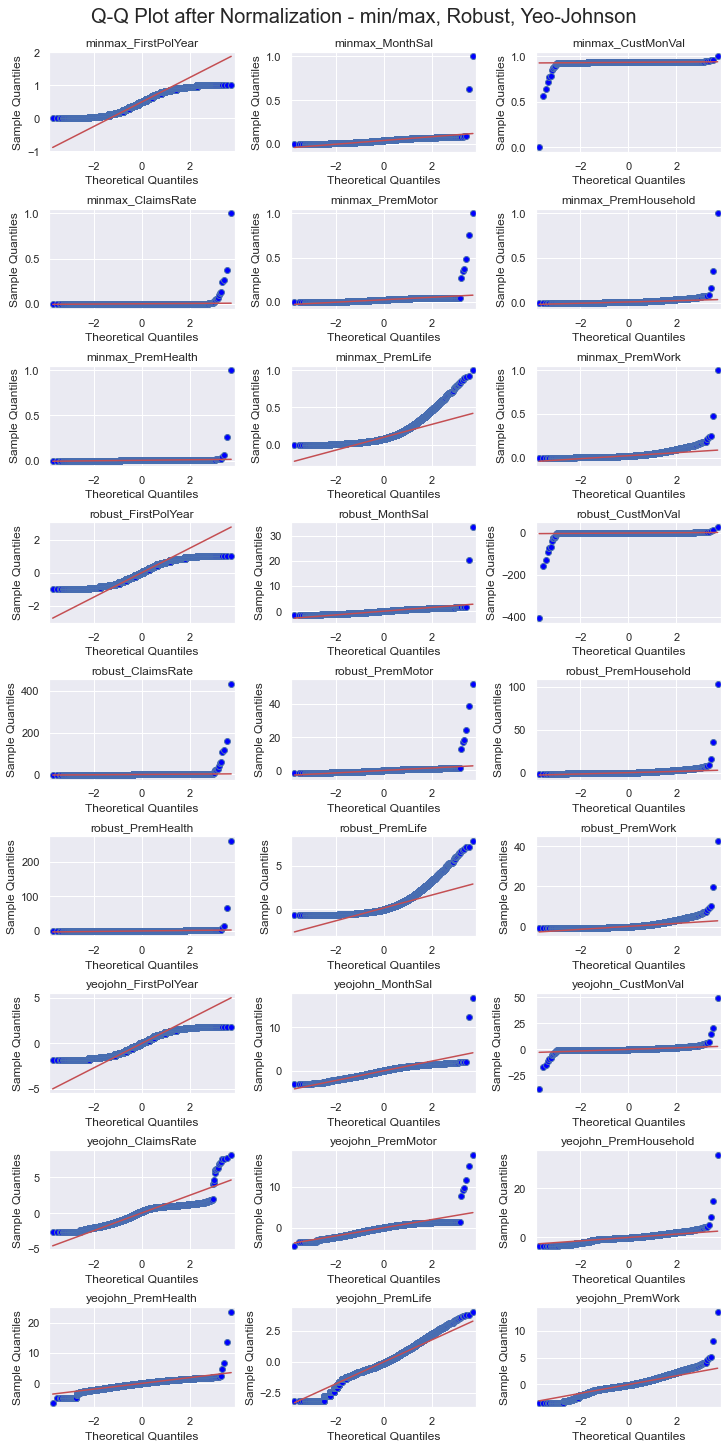

In [272]:
# Plot transformed data
sns.set()
fig, axes = plt.subplots(9,3, constrained_layout = True, figsize = (10,20))

fig.suptitle("Q-Q Plot after Normalization - min/max, Robust, Yeo-Johnson", fontsize = 20)
for c, ax in zip(normal_res_df.columns, axes.flatten()):
    x = normal_res_df.loc[:,c]
    sm.qqplot(x, line = "q", ax = ax)
    ax.set_title(c)

plt.show()

In [274]:
# We will only use yeo-johnson as the results most consistly produced normal distribution spread (esepcially prem life)
scaled_yj_df = normal_res_df.loc[:,[i for i in normal_res_df.columns.to_list() if "yeojohn" in i]]
scaled_yj_df.head()

,yeojohn_FirstPolYear,yeojohn_MonthSal,yeojohn_CustMonVal,yeojohn_ClaimsRate,yeojohn_PremMotor,yeojohn_PremHousehold,yeojohn_PremHealth,yeojohn_PremLife,yeojohn_PremWork
0,-0.159540,-0.208262,0.373110,-0.802584,0.579275,-0.323080,-0.098913,0.395210,-0.340394
1,-0.762374,-2.164826,-0.673247,1.152632,-1.657409,0.849026,-0.501714,2.376498,1.339238
2,0.752853,-0.108828,0.739361,-1.239652,-0.472750,0.240085,-0.388233,1.072008,1.236246
3,0.600107,-1.483907,-0.601578,0.887313,-0.652151,-0.498403,1.460896,0.143842,-0.039137
4,-0.008155,-0.647551,-0.523969,0.687413,0.374418,-0.475195,0.322091,-0.295992,0.251891


In [275]:
scaled_yj_df.columns

Index(['yeojohn_FirstPolYear', 'yeojohn_MonthSal', 'yeojohn_CustMonVal',
       'yeojohn_ClaimsRate', 'yeojohn_PremMotor', 'yeojohn_PremHousehold',
       'yeojohn_PremHealth', 'yeojohn_PremLife', 'yeojohn_PremWork'],
      dtype='object')

In [300]:
scaled_yj_df.insert(0, 'CustID',0)
scaled_yj_df['CustID'] = df['CustID']

In [304]:
scaled_yj_df.set_index('CustID',inplace=True)

### 3.2.4 Outliers Treatment

### Univariate
#### IQR method

In [315]:
#outlier removal using IQR method
q25 = scaled_yj_df.quantile(.25)
q75 = scaled_yj_df.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters = []
num_var = scaled_yj_df.columns.to_list()
for numerical in num_var:
    llim = lower_lim[numerical]
    ulim = upper_lim[numerical]
    filters.append(scaled_yj_df[numerical].between(llim, ulim, inclusive=True))

df_iqr = scaled_yj_df[np.all(filters, 0)]
print('Number of outliers:', (scaled_yj_df.shape[0] - df_iqr.shape[0]))
print('Percentage of data kept after removing outliers:', (np.round(df_iqr.shape[0] / scaled_yj_df.shape[0], 3))*100)
#df = df.loc[df_iqr.index]

Number of outliers: 1575
Percentage of data kept after removing outliers: 84.7


**z-scores**

In [314]:
z_scores = stats.zscore(scaled_yj_df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

df_zscore = scaled_yj_df[filtered_entries]
print('Number of outliers:', (scaled_yj_df.shape[0] - df_zscore.shape[0]))
print('Percentage of data kept after removing outliers:', np.round(df_zscore.shape[0] / scaled_yj_df.shape[0], 3)*100)

Number of outliers: 431
Percentage of data kept after removing outliers: 95.8


**Median Absolute Deviation**

In [308]:
# https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755

def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index = 0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:,variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [329]:
for c in scaled_yj_df:
    out_idx = mad_method(scaled_yj_df, c)
    print(f'-----{c}-----')
    print('Number of outliers:', len(out_idx))
    print('The index of outliers:', out_idx)

-----yeojohn_FirstPolYear-----
Number of outliers: 0
The index of outliers: []
-----yeojohn_MonthSal-----
Number of outliers: 2
The index of outliers: [5876, 8251]
-----yeojohn_CustMonVal-----
Number of outliers: 12
The index of outliers: [2041, 2321, 4367, 4742, 5078, 5287, 6692, 6733, 7076, 8356, 8656, 9224]
-----yeojohn_ClaimsRate-----
Number of outliers: 15
The index of outliers: [51, 112, 135, 171, 655, 675, 707, 758, 793, 916, 950, 981, 1024, 7952, 9635]
-----yeojohn_PremMotor-----
Number of outliers: 6
The index of outliers: [5122, 5205, 5287, 6692, 7076, 7894]
-----yeojohn_PremHousehold-----
Number of outliers: 10
The index of outliers: [1068, 2321, 4367, 6336, 6826, 8356, 8415, 8656, 8855, 9224]
-----yeojohn_PremHealth-----
Number of outliers: 4
The index of outliers: [5205, 5287, 7951, 9138]
-----yeojohn_PremLife-----
Number of outliers: 1
The index of outliers: [3481]
-----yeojohn_PremWork-----
Number of outliers: 6
The index of outliers: [149, 1743, 1773, 5078, 6947, 7951]


In [310]:
scaled_yj_df.describe().loc[['min','max']]

,yeojohn_FirstPolYear,yeojohn_MonthSal,yeojohn_CustMonVal,yeojohn_ClaimsRate,yeojohn_PremMotor,yeojohn_PremHousehold,yeojohn_PremHealth,yeojohn_PremLife,yeojohn_PremWork
min,-1.806958,-2.914590,-38.085543,-2.671813,-4.323278,-3.401896,-6.327575,-3.183343,-3.391983
max,1.829754,16.814695,49.621239,8.176911,17.872138,33.739546,23.616976,4.074478,13.515317


In [312]:
scaled_yj_df.median()

yeojohn_FirstPolYear    -0.008155
yeojohn_MonthSal         0.108795
yeojohn_CustMonVal      -0.162236
yeojohn_ClaimsRate       0.240100
yeojohn_PremMotor        0.139236
yeojohn_PremHousehold   -0.095950
yeojohn_PremHealth       0.095742
yeojohn_PremLife        -0.102719
yeojohn_PremWork        -0.107146
dtype: float64

### Multivariate
#### DBSCAN
How to choose the parameter for DBSCAN:
- Min points: If the data has more than 2 dimensions, choose MinPts = 2*dim,
where dim= the dimensions of your data set (Sander et al., 1998).
-Calculate the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In [54]:
#Calculate the average distance between each point in the data set and its 20 nearest neighbors
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(scaled_yj_df)
distances, indices = neighbors_fit.kneighbors(scaled_yj_df)

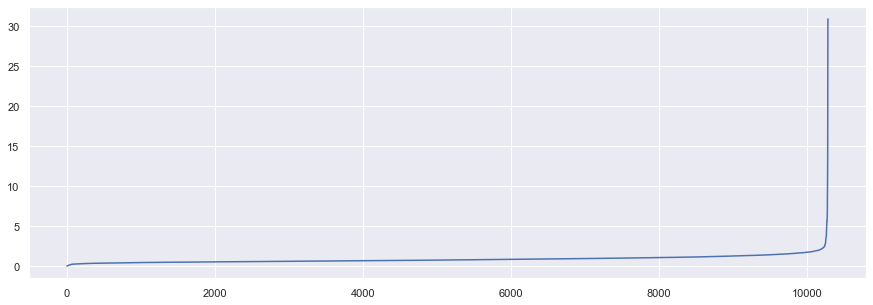

In [55]:
#Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#the elbow values (distance on the y axis gives us the best value for eps)

In [74]:
model = DBSCAN(eps = 2, min_samples = 18).fit(scaled_yj_df)

#converting the array into dataframe to group by labels and check the counts

labels = model.labels_
labels_df =  pd.DataFrame(labels, columns=['cluster'])
labels_df['cluster'].value_counts()

#-1 label corresponds to the outliers

 0    9997
-1     285
Name: cluster, dtype: int64

#### Connectivity Outlier Factor (COF)

In [57]:
cof = COF()
cof.fit(scaled_yj_df)
#Using predict method for identifying outliers
predict_cof = cof.predict(scaled_yj_df)
#let's count the total number of outliers
np.sum(predict_cof)

1029

In [95]:
# Malhalanobis
# https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3
# https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33

#Mahalonibis Distance
def mahalanobis_method(df):
    #M-Distance
    x_minus_mu = df - np.mean(df)
    cov = np.cov(df.values.T)                           #Covariance
    inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
    left_term = np.dot(x_minus_mu, inv_covmat) 
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    #Cut-off point
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))    #degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

In [96]:
outliers_mahal, md = mahalanobis_method(df=scaled_yj_df)

In [98]:
len(outliers_mahal)

157

## 3.3 Data Engineering  <a class="anchor" id="3.3"></a>

In [58]:
# age from first policy
# considered swap when FirstPolYear is before BirthYear
df['ageFirstPolicy'] = np.where(df['FirstPolYear'] > df['BirthYear'], 
                                df['FirstPolYear'] - df['BirthYear'], 
                                df['BirthYear'] - df['FirstPolYear']) 
                                    

In [59]:
#age from birthyear 
df['age'] = 2016.0 - df['BirthYear']

In [60]:
df['totalPremium'] = df['PremMotor'] + df['PremHousehold'] + df['PremHealth'] + df['PremLife'] + df['PremWork'] 

df['%PremMotor']     = df['PremMotor'] / df['totalPremium']
df['%PremHousehold'] = df['PremHousehold'] / df['totalPremium']
df['%PremHealth']    = df['PremHealth'] / df['totalPremium']
df['%PremLife']      = df['PremLife'] / df['totalPremium']
df['%PremWork']      = df['PremWork'] / df['totalPremium']

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10282 entries, 0 to 10295
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustID                 10282 non-null  float64
 1   FirstPolYear           10252 non-null  float64
 2   BirthYear              10282 non-null  float64
 3   EducDeg                10282 non-null  float64
 4   MonthSal               10282 non-null  float64
 5   GeoLivArea             10282 non-null  float64
 6   Children               10282 non-null  float64
 7   CustMonVal             10282 non-null  float64
 8   ClaimsRate             10282 non-null  float64
 9   PremMotor              10282 non-null  float64
 10  PremHousehold          10282 non-null  float64
 11  PremHealth             10282 non-null  float64
 12  PremLife               10282 non-null  float64
 13  PremWork               10282 non-null  float64
 14  yeojohn_EducDeg        10282 non-null  float64
 15  ye

## 3.4 Data Integration  <a class="anchor" id="3.4"></a>

In [62]:
considered_df_all_Pct_prem = df[['EducDeg',
                                'Children',
                                'GeoLivArea',
                                #'ageFirstPolicy',
                                'age',
                                'yeojohn_MonthSal',
                                '%PremMotor',
                                '%PremHousehold',
                                '%PremHealth',
                                '%PremLife',
                                '%PremWork']]

considered_df_all_YJprem = df[['EducDeg',
                                'Children',
                                'GeoLivArea',
                                #'ageFirstPolicy',
                                'age',
                                'yeojohn_MonthSal',
                                'yeojohn_PremMotor',
                                'yeojohn_PremHousehold',
                                'yeojohn_PremHealth',
                                'yeojohn_PremLife',
                                'yeojohn_PremWork']]

considered_df_socioDem = df[['EducDeg',
                             'Children',
                             'GeoLivArea',
                             #'ageFirstPolicy',
                             'age',
                             'yeojohn_MonthSal']]


## 3.5 Data Formatting  <a class="anchor" id="3.5"></a>

## 3.6 Data Description  <a class="anchor" id="3.6"></a>

In [63]:
def inertiaPlot(df):
    inertia = []
    for n_clus in range(1,20):  # iterate over desired ncluster range
        kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
        kmclust.fit(df)
        inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

    # The inertia plot
    plt.figure(figsize=(9,5))
    plt.plot(inertia)
    plt.ylabel("Inertia: SSw")
    plt.xlabel("Number of clusters")
    plt.title("Inertia plot over clusters", size=15)
    plt.show()

In [64]:
def kmeans_Hierarchical(considered_df,threshold=0.3):
    kmeans = KMeans(n_clusters=100, random_state=0).fit(considered_df)
    considered_df['Cluster'] = pd.Series(kmeans.labels_)
    kmeans_clusters = considered_df.groupby("Cluster").mean()
    considered_df.drop('Cluster',axis=1,inplace=True)
    
    # Hierarchical clustering assessment using scipy
    Z = linkage(kmeans_clusters, method='ward')
    sns.set()
    fig = plt.figure(figsize=(15,7))

    # Dendrogram
    set_link_color_palette(list(sns.color_palette().as_hex()))
    dendrogram(Z, color_threshold = threshold*max(Z[:,2]), orientation='top', no_labels=True, above_threshold_color='k')

    plt.hlines(threshold*max(Z[:,2]), 0, 1000, colors="r", linestyles="dashed")
    plt.title('Hierarchical Clustering - Ward\'s Dendrogram', fontsize=23)
    plt.xlabel('SOM Units', fontsize=13)
    plt.ylabel('Euclidean Distance', fontsize=13)
    plt.show()

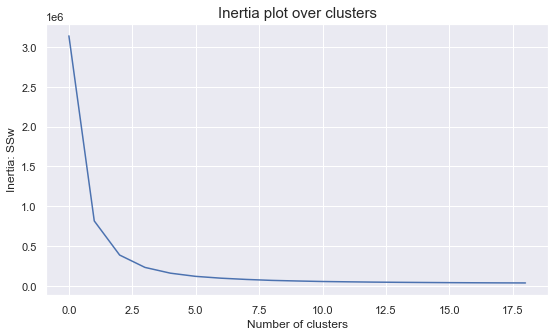

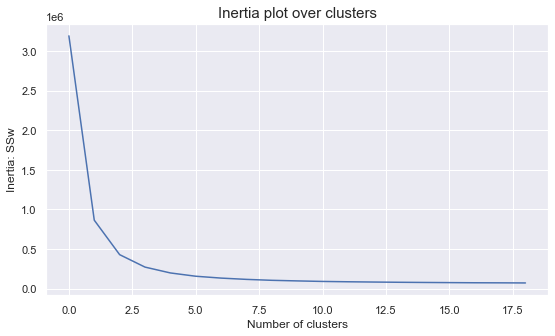

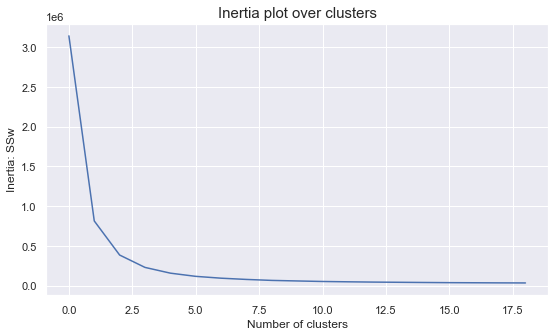

In [65]:
inertiaPlot(considered_df_all_Pct_prem)
inertiaPlot(considered_df_all_YJprem)
inertiaPlot(considered_df_socioDem)

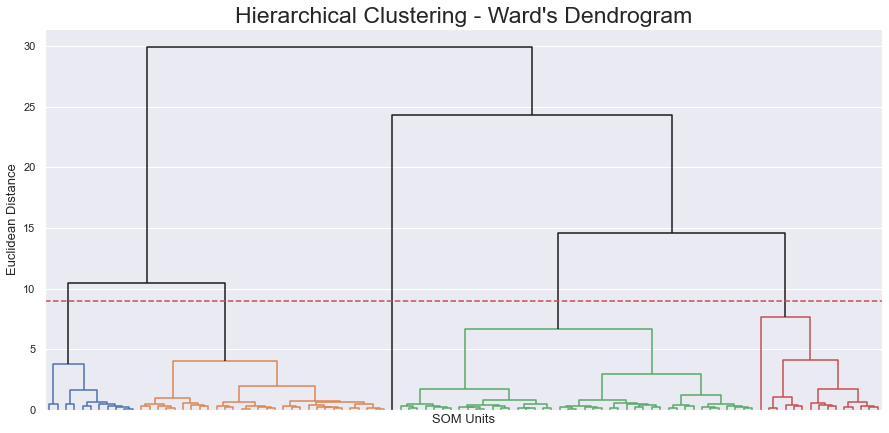

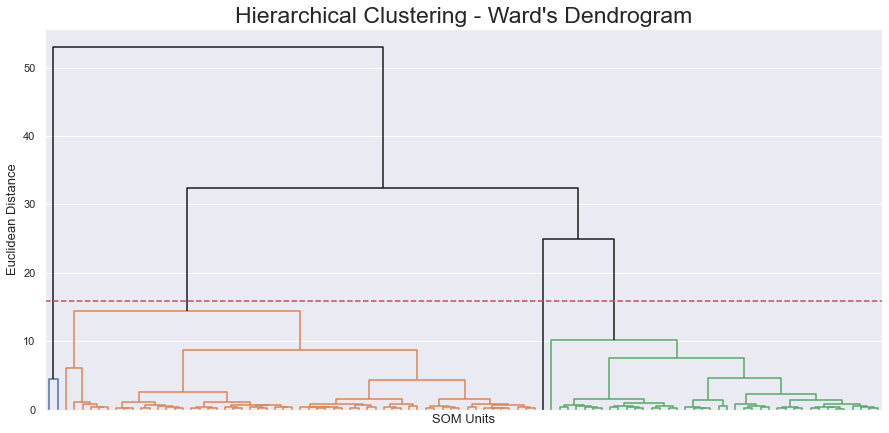

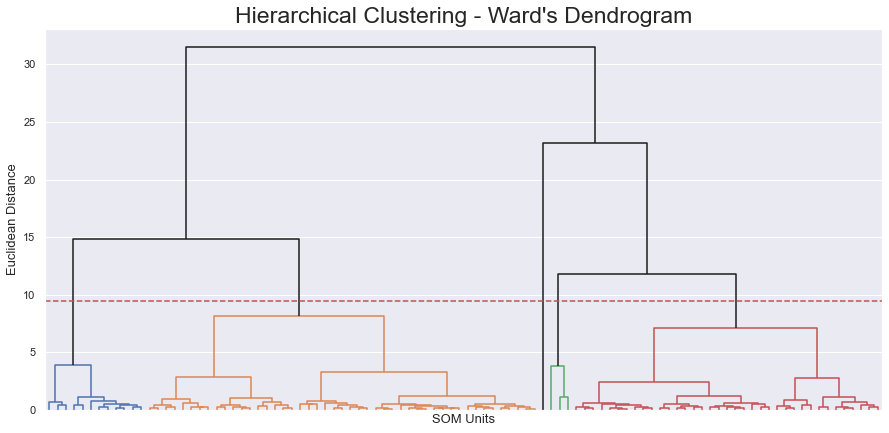

In [66]:
kmeans_Hierarchical(considered_df_all_Pct_prem)
kmeans_Hierarchical(considered_df_all_YJprem)
kmeans_Hierarchical(considered_df_socioDem)

In [67]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(considered_df)
considered_df['Cluster'] = pd.Series(kmeans.labels_)
kmeans_clusters = considered_df.groupby("Cluster").mean()
kmeans_clusters

NameError: name 'considered_df' is not defined